In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# Load the dataset from CSV
data = pd.read_csv(r"C:\Users\ronob\Desktop\my project\Data\clean_sales_data.csv", delimiter='\t')
print(data.columns)

Index(['Inventory,Customer Type,Gender,City,Product Line,Unit Price,Quantity,Tax 16%,Total,Payment,COGS,Gross Margin Percentage,Gross Income,Rating,Branch'], dtype='object')


In [15]:
#Grouping the data by city and product line and calculating aggregate statistics
city_product_performance = data.groupby(['City', 'Product Line']).agg({
    'Total': 'sum',  # Calculating the total sales for each product line in each city
    'Quantity': 'sum'  # Calculating the total quantity sold for each product line in each city
})

# Resetting the index for better readability
city_product_performance = city_product_performance.reset_index()

# Sorting the data by total sales in descending order
city_product_performance = city_product_performance.sort_values('Total', ascending=False)

# Printing the analyzed data
print(city_product_performance)

       City            Product Line         Total  Quantity
17  Nairobi  Electronic accessories  2.194187e+06     18154
16  Nairobi              Baby Items  2.072776e+06     17075
19  Nairobi       Health and beauty  1.660532e+06     14010
8   Mombasa              Baby Items  1.405121e+06     11714
9   Mombasa  Electronic accessories  1.376485e+06     11475
23  Nairobi       Sports and travel  1.367882e+06     11570
21  Nairobi           Prepared Food  1.298680e+06     10886
20  Nairobi      Household supplies  1.280242e+06     10925
18  Nairobi               Groceries  1.166580e+06     10121
22  Nairobi                  Snacks  1.163568e+06      9916
0    Kisumu              Baby Items  1.065336e+06      8909
11  Mombasa       Health and beauty  1.031316e+06      8574
1    Kisumu  Electronic accessories  1.008885e+06      8455
15  Mombasa       Sports and travel  9.147807e+05      7813
12  Mombasa      Household supplies  8.484478e+05      7254
13  Mombasa           Prepared Food  8.0

In [16]:
# Divide the dataset into male and female groups
male_ratings = data[data['Gender'] == 'Male']['Rating']
female_ratings = data[data['Gender'] == 'Female']['Rating']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(male_ratings, female_ratings)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 1.6511728587142789
P-Value: 0.09871113393728104


In [5]:

# Calculate total sales per city
city_sales = data.groupby('City')['Total'].sum()

# Calculate average sales per customer in each city
city_avg_sales = data.groupby('City')['Total'].mean()

# Sort the data in descending order
city_sales = city_sales.sort_values(ascending=False)
city_avg_sales = city_avg_sales.sort_values(ascending=False)

# Print the results
print("Total Sales per City:")
print(city_sales)

print("\nAverage Sales per Customer in each City:")
print(city_avg_sales)

# Identify the top-performing branches
top_branches = data.groupby(['City', 'Branch'])['Total'].sum().groupby('City').idxmax().values
top_branches = [branch[1] for branch in top_branches]
top_branches = pd.Series(top_branches, index=city_sales.index)

print("\nTop-Performing Branches:")
print(top_branches)


Total Sales per City:
City
Nairobi    1.220445e+07
Mombasa    7.962405e+06
Kisumu     5.915256e+06
Name: Total, dtype: float64

Average Sales per Customer in each City:
City
Nairobi    653.587953
Kisumu     651.531696
Mombasa    650.098364
Name: Total, dtype: float64

Top-Performing Branches:
City
Nairobi    Naivas
Mombasa    Naivas
Kisumu     Naivas
dtype: object


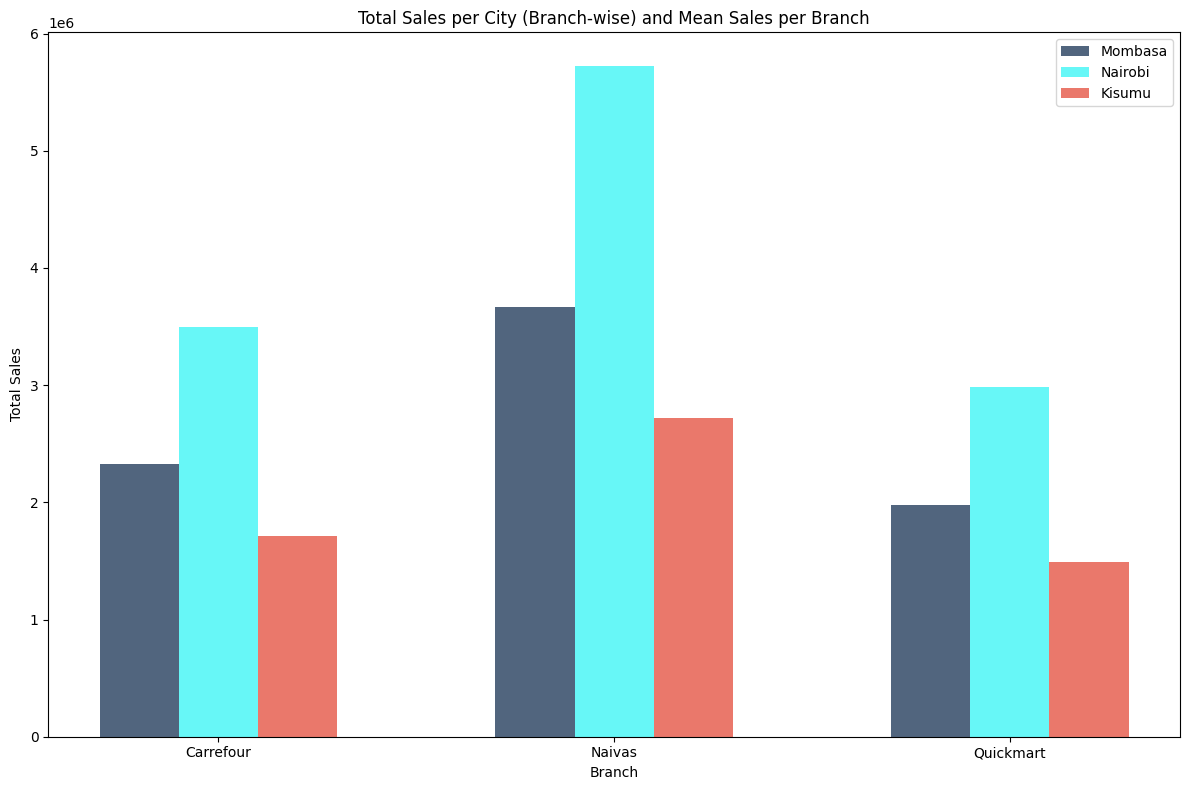

In [13]:
cities = data['City']
branches = data['Branch']
total_sales = data['Total']

# Create a separate bar plot for each city
plt.figure(figsize=(12, 8))

# Grouped bar plot 
city_labels = data['City'].unique()
bar_width = 0.2
opacity = 0.7
index = [-1, 0, 1]
colors = ['#072448', '#26f5f5', '#e23f2d']

for i, city in enumerate(city_labels):
    city_sales = total_sales[cities == city]
    branch_sales = [city_sales[branches == branch].sum() for branch in ['Carrefour', 'Naivas', 'Quickmart']]
    plt.bar([ind + index[i] * bar_width for ind in range(len(branch_sales))], branch_sales, bar_width,
            alpha=opacity, color=colors[i], label=city)


# Set plot title and axis labels
plt.title('Total Sales per City (Branch-wise)')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(range(len(branch_mean_sales)), branch_mean_sales.index)
plt.legend()

# Adjust the layout to accommodate the x-axis labels
plt.tight_layout()
plt.show()



In [7]:


# Calculate the total revenue and quantity sold for each product line
product_sales = data.groupby('Product Line').agg({'Total': 'sum', 'Quantity': 'sum'})

# Sort the product sales in descending order
product_sales = product_sales.sort_values(by='Total', ascending=False)

# Identify the bestselling and least-selling product lines
bestselling_product = product_sales.index[0]
least_selling_product = product_sales.index[-1]

# Calculate gross margin percentage and gross income for each product line
product_profitability = data.groupby('Product Line').agg({'Gross Margin Percentage': 'mean', 'Gross Income': 'sum'})

# Print the results
print("Total Revenue and Quantity Sold by Product Line:")
print(product_sales)
print("\nBestselling Product Line:", bestselling_product)
print("Least-selling Product Line:", least_selling_product)
print("\nGross Margin Percentage and Gross Income by Product Line:")
print(product_profitability)


Total Revenue and Quantity Sold by Product Line:
                               Total  Quantity
Product Line                                  
Electronic accessories  4.579558e+06     38084
Baby Items              4.543234e+06     37698
Health and beauty       3.451808e+06     29216
Sports and travel       2.946219e+06     25042
Prepared Food           2.741918e+06     23034
Household supplies      2.736223e+06     23424
Groceries               2.576250e+06     21689
Snacks                  2.506899e+06     21328

Bestselling Product Line: Electronic accessories
Least-selling Product Line: Snacks

Gross Margin Percentage and Gross Income by Product Line:
                        Gross Margin Percentage  Gross Income
Product Line                                                 
Baby Items                             0.350796  1.379009e+06
Electronic accessories                 0.348265  1.372437e+06
Groceries                              0.349854  7.767817e+05
Health and beauty          

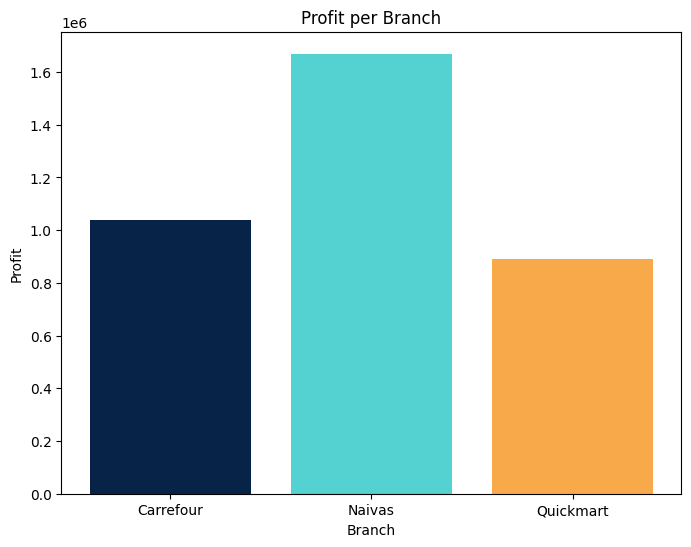

In [8]:
# Calculate profit per branch
branch_profit_data = data.groupby('Branch').agg({'Total': 'sum', 'COGS': 'sum'})
branch_profit_data['Profit'] = branch_profit_data['Total'] - branch_profit_data['COGS']

# Create a bar plot
plt.figure(figsize=(8, 6))
colors=['#072448','#54d2d2','#f8aa4b']
plt.bar(branch_profit_data.index, branch_profit_data['Profit'], color=colors)

plt.title('Profit per Branch')
plt.xlabel('Branch')
plt.ylabel('Profit')
plt.show()


In [9]:
branch_product_data = data.groupby(['Branch', 'Product Line']).agg({'Total': 'sum', 'Quantity': 'sum', 'Gross Income': 'sum'})
for (branch, product_line), row in branch_product_data.iterrows():
    total_sales = row['Total']
    quantity_sold = row['Quantity']
    gross_income = row['Gross Income']
    
    print(f"Branch: {branch}")
    print(f"  Product Line: {product_line}")
    print(f"  Total Sales: {total_sales}")
    print(f"  Quantity Sold: {quantity_sold}")
    print(f"  Gross Income: {gross_income}")
    print()



Branch: Carrefour
  Product Line: Baby Items
  Total Sales: 1317541.36410038
  Quantity Sold: 11103.0
  Gross Income: 395084.708083237

Branch: Carrefour
  Product Line: Electronic accessories
  Total Sales: 1280724.652670822
  Quantity Sold: 10676.0
  Gross Income: 382406.218689592

Branch: Carrefour
  Product Line: Groceries
  Total Sales: 775657.639244429
  Quantity Sold: 6367.0
  Gross Income: 236110.629709506

Branch: Carrefour
  Product Line: Health and beauty
  Total Sales: 1008574.519509261
  Quantity Sold: 8558.0
  Gross Income: 304268.55116148

Branch: Carrefour
  Product Line: Household supplies
  Total Sales: 780850.226651717
  Quantity Sold: 6604.0
  Gross Income: 232111.231720962

Branch: Carrefour
  Product Line: Prepared Food
  Total Sales: 789238.33247178
  Quantity Sold: 6648.0
  Gross Income: 238567.848075805

Branch: Carrefour
  Product Line: Snacks
  Total Sales: 721062.136535825
  Quantity Sold: 6072.0
  Gross Income: 219251.602294072

Branch: Carrefour
  Product 